In [3]:
import pandas as pd

data = pd.read_csv("all_relevant_for_plotting.tsv", sep = "\t").to_dict("records")



In [9]:
from collections import  Counter
frequencies = []
for article in data:
    frequencies.append((article["date"].split("-")[1] + "/" + article["date"].split("-")[0]).replace("/20", "/"))
    


In [18]:
by_month = {}

for year in [str(y) for y in range(15, 23)]:
    for month in ["0"+str(m) for m in range(1, 10)] + ["11", "12", "13"]:
        if (year == "15" and month in ["01", "02"]) or (year == "22" and month in ["0"+str(i) for i in range(9, 13)]):
            continue
        by_month[month + "/" + year] = 0

for date in by_month:
    by_month[date] = len([y for y in frequencies if y==date])

NameError: name 'colors' is not defined

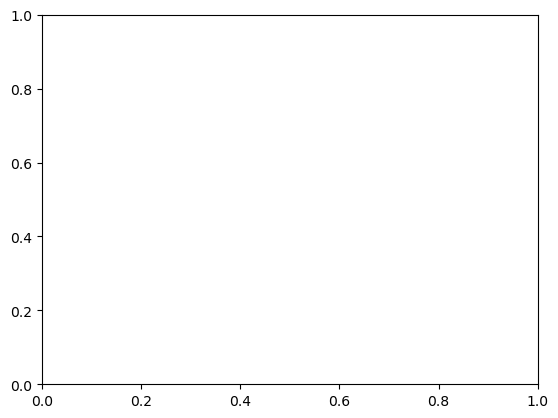

In [20]:
import matplotlib.pyplot as plt
vis_data = by_month
years = ["20"+ y for y in list(vis_data.keys())]

freq = list(vis_data.values())

fig, ax = plt.subplots()
width = 0.6

plt.bar(years, freq, width=width, color=colors[topic])
plt.title(f"{topic} pro Jahr")
plt.xlabel("Jahre")
plt.ylabel("Artikelanzahl")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.set_figheight(8)

fig.set_figwidth(15)
plt.xlabel("Monat")
plt.ylabel("Artikelanzahl")

ax.set_axisbelow(True)

plt.grid(axis="y", which="major", linestyle="-", color='#f0f0f0')

for i, year in enumerate(vis_data.keys()):
        plt.text(i , vis_data[year] + 1  , "$n$=" + str(vis_data[year]) , 
                            va = 'center', ha = 'center', rotation = 0, fontsize = 10
                            )


plt.savefig(f'alle-pro-jahr.png', dpi=300, bbox_inches='tight')


